In [ ]:
import sys
sys.path.append('../src')
from data_processing import DataLoader, DataCleaner, EDAProcessor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [ ]:
loader = DataLoader("../data/raw/creditcard.csv")
cc_data = loader.load_data()

In [ ]:
cleaner = DataCleaner(cc_data)

In [ ]:
cleaner.data_overview()

In [ ]:
cleaner.missing_values_summary()


In [ ]:
cleaner.handle_missing_values()  # should fill or report NaNs

In [ ]:
cleaner.remove_duplicates()

In [ ]:
cc_cleaned = cleaner.df

### Exploratory Data Analysis

Initialize EDA Processor

In [ ]:
eda = EDAProcessor(cc_cleaned)

### Univariate Analysis

In [ ]:
num_stats = eda.summary_statistics(["Time", "Amount"])
display(num_stats)

In [ ]:
# Plot first 2 numerical features as example
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
for ax, col in zip(axes, ["Time", "Amount"]):
    sns.histplot(cc_cleaned[col], bins=50, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### Bivariate Analysis (Numerical Features vs Target)

In [ ]:
# Boxplots for first 2 numerical features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, col in zip(axes, ["Time", "Amount"]):
    sns.boxplot(x="Class", y=col, data=cc_cleaned, ax=ax)
    ax.set_title(f"{col} by Class")
plt.tight_layout()
plt.show()

### Class Distribution

,count,percentage
Class,,
0,283253,0.998333
1,473,0.001667


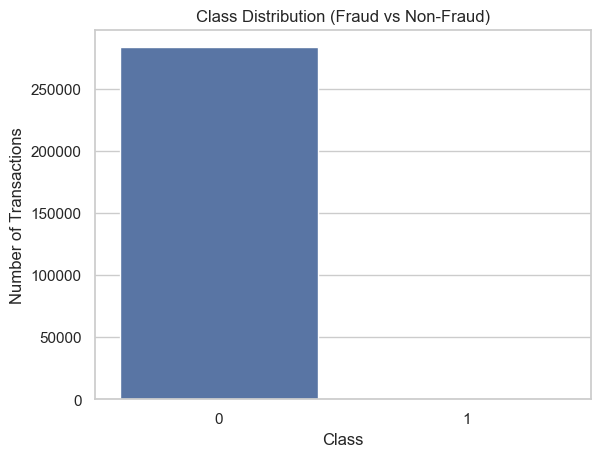

In [16]:
class_dist = eda.class_distribution("Class")
display(class_dist)

# Plot class distribution
sns.barplot(x=class_dist.index, y=class_dist["count"])
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.ylabel("Number of Transactions")
plt.show()

In [17]:
data_loader = DataLoader()
data_loader.df = cc_cleaned
data_loader.save_data("../data/processed/creditcard_cleaned.csv")